# Testing our own numbers on the Models

In [1]:
import pandas as pd
import numpy as np
import joblib
import cv2
import matplotlib.pyplot as plt

In [2]:
import os

# Generate Image Paths
folders = ['Gabes_Nums_Formatted/', 'Philips_Nums_Formatted/']
img_paths = []
for folder in folders:
    for file in os.listdir(folder):
        img_paths.append(folder + file)

print(len(img_paths))

20


In [3]:
import tensorflow as tf

def get_standard_data():
	(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

	# Normalize Data Set
	x_train = x_train / 255.0
	x_test = x_test / 255.0

	# Use only the training input for normalization.. avoid info leak
	mu = np.mean(x_train)
	std = np.std(x_train)

	x_train = (x_train - mu) / std
	x_test = (x_test - mu) / std

	return x_train, y_train, x_test, y_test, mu, std

def standardize_input(input, mu, std):
    
    return (np.array(input)/255 - mu) / std

_, _, test_x, test_y, mu, std = get_standard_data()

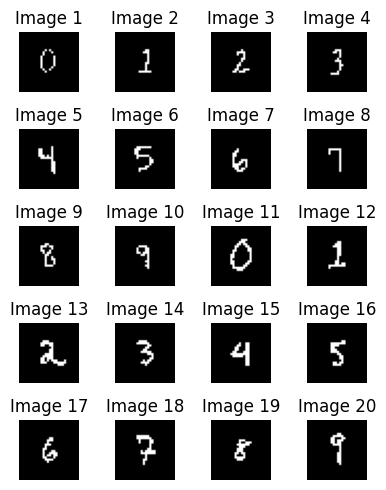

In [4]:
num_imgs = len(img_paths)

# Function to read images from paths and convert to grayscale
def grey_scale(img_paths):
    grey_list = []
    for path in img_paths:
        img = cv2.imread(path)  # Read the image from the file path
        if img is not None:  # Check if the image was loaded correctly
            grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            grey_list.append(grey)
        else:
            print(f"Failed to load image from {path}")
    return grey_list

# Function to resize images
def resize(grey_list):
    resized_list = []
    for img in grey_list:
        resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
        resized_list.append(resized)
    return resized_list

# Function to convert images to black and white
def black_white(resized_list):
    black_white_list = []
    for img in resized_list:
        _, black_white = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        black_white_list.append(black_white)
    return black_white_list

# Function to invert colors (black to white, white to black)
def invert_colors(bw_list):
    inverted_list = []
    for img in bw_list:
        inverted = 255 - img  # Invert colors
        inverted_list.append(inverted)
    return inverted_list

# Applying the functions
grey_list = grey_scale(img_paths)
resized_list = resize(grey_list)
black_white_list = black_white(resized_list)
# inverted_list = invert_colors(black_white_list)
inverted_list = standardize_input(black_white_list, mu, std)

# Displaying the images
cols = int(np.sqrt(num_imgs))
rows = int(np.ceil(num_imgs / cols))
plt.figure(figsize=(cols, rows))
for i, img in enumerate(inverted_list, 1):
    plt.subplot(rows, cols, i)
    plt.imshow(img, cmap='gray')
    plt.title(f'Image {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
# print(inverted_list)

In [6]:
flattened_images = [img.flatten() for img in inverted_list]

# Printing the first few elements of each flattened image to check
for i, img in enumerate(flattened_images, 1):
    print(f"Image {i}: {img[:10]}...")

Image 1: [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389]...
Image 2: [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389]...
Image 3: [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389]...
Image 4: [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389]...
Image 5: [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389]...
Image 6: [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389]...
Image 7: [-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389]...
Image 8: [-0.42407389 -0.42407389 -0.42407389 -0.424073

In [7]:
# Test Neural Networks
model_folders = ["MLP/", "CNN/"]
model_dirs = []
for folder in model_folders:
    dir = "Models/" + folder
    for file in os.listdir(dir):
        model_dirs.append(dir + file)

test_images = np.array(inverted_list)
print(test_images.shape)


all_preds = []
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] * 2
for model_dir in model_dirs:
    print(f"Importing and Testing {model_dir}")
    model = tf.keras.models.load_model(model_dir)

    predictions = model.predict(test_images)
    predictions = np.argmax(predictions, axis=1)
    all_preds.append(predictions)

(20, 28, 28)
Importing and Testing Models/MLP/16x2_MLP.keras

1/1 [==============================] - 0s 133ms/step
Importing and Testing Models/MLP/32x2_MLP.keras
1/1 [==============================] - 0s 81ms/step
Importing and Testing Models/CNN/16x1_CNN.keras
1/1 [==============================] - 0s 74ms/step
Importing and Testing Models/CNN/16x2_CNN.keras
1/1 [==============================] - 0s 75ms/step
Importing and Testing Models/CNN/16x4_CNN.keras
1/1 [==============================] - 0s 82ms/step


Importing and Testing Models/CNN/16x4_CNN.keras
313/313 [==============================] - 0s 1ms/step
(10000,)
(10000,)
[7 8 9 0 1 2 3 4 5 6]
[7 8 9 0 1 2 3 4 5 6]


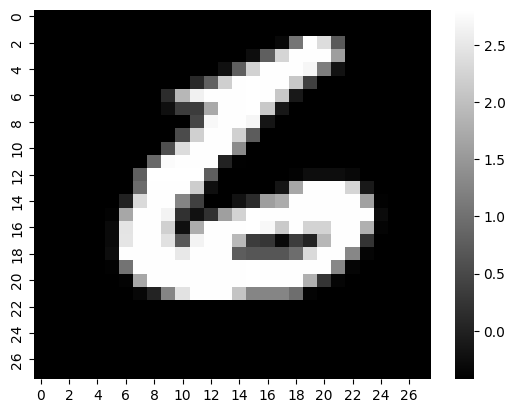

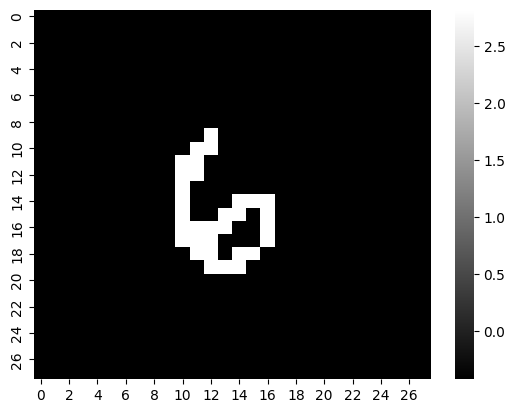

In [8]:
import seaborn as sns

model_dir = model_dirs[-1]
model = tf.keras.models.load_model(model_dir)
print(f"Importing and Testing {model_dir}")
preds = model.predict(test_x)
preds = np.argmax(preds, axis=1)
                
print(preds.shape)
print(test_y.shape)
print(preds[-10:])
print(test_y[-10:])

sns.heatmap(test_x[-1], annot=False, cmap='gray', fmt='.2f', cbar=True)
plt.savefig("Figures/DigitAnalysis/MNIST_6.png")
plt.show()

sns.heatmap(test_images[6], annot=False, cmap='gray', fmt='.2f', cbar=True)
plt.savefig("Figures/DigitAnalysis/Gabe_6.png")
plt.show()

Accuracy of Models/MLP/16x2_MLP.keras: 50.00%


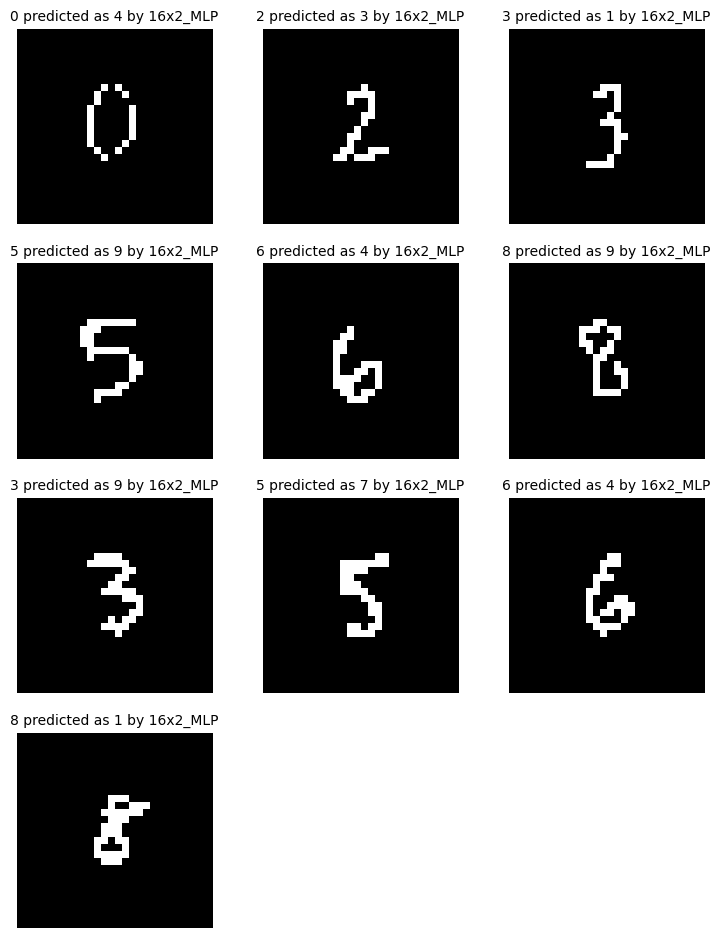

Accuracy of Models/MLP/32x2_MLP.keras: 45.00%


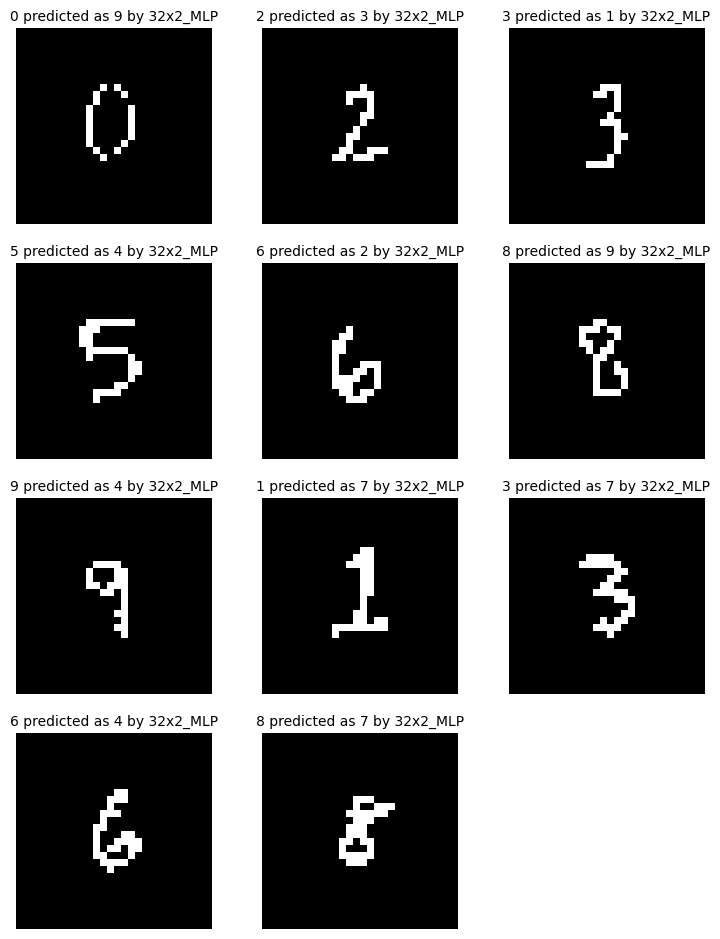

Accuracy of Models/CNN/16x1_CNN.keras: 45.00%


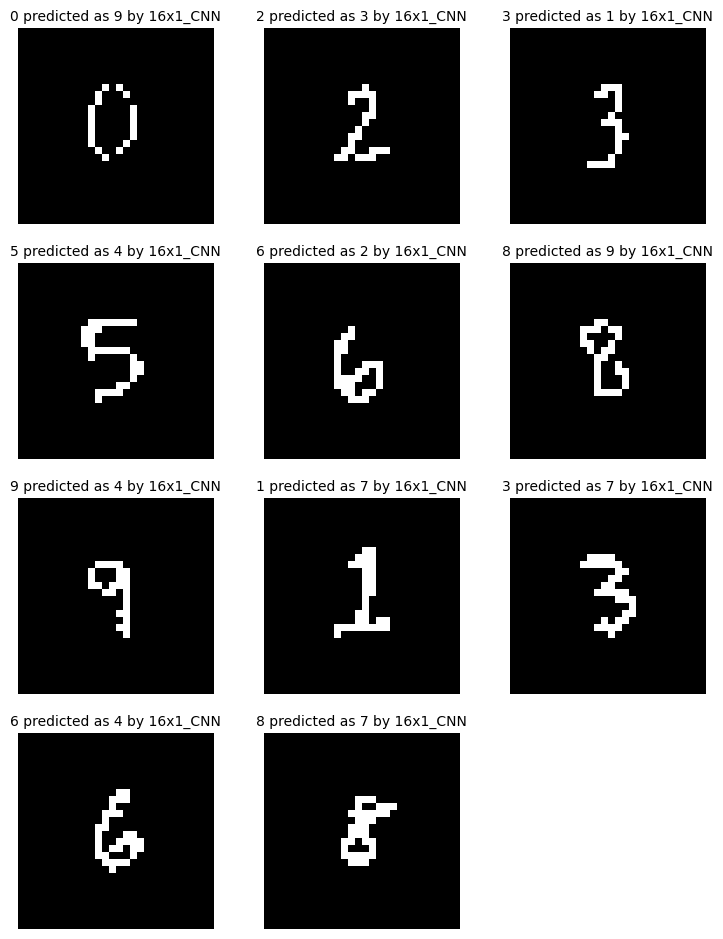

Accuracy of Models/CNN/16x2_CNN.keras: 45.00%


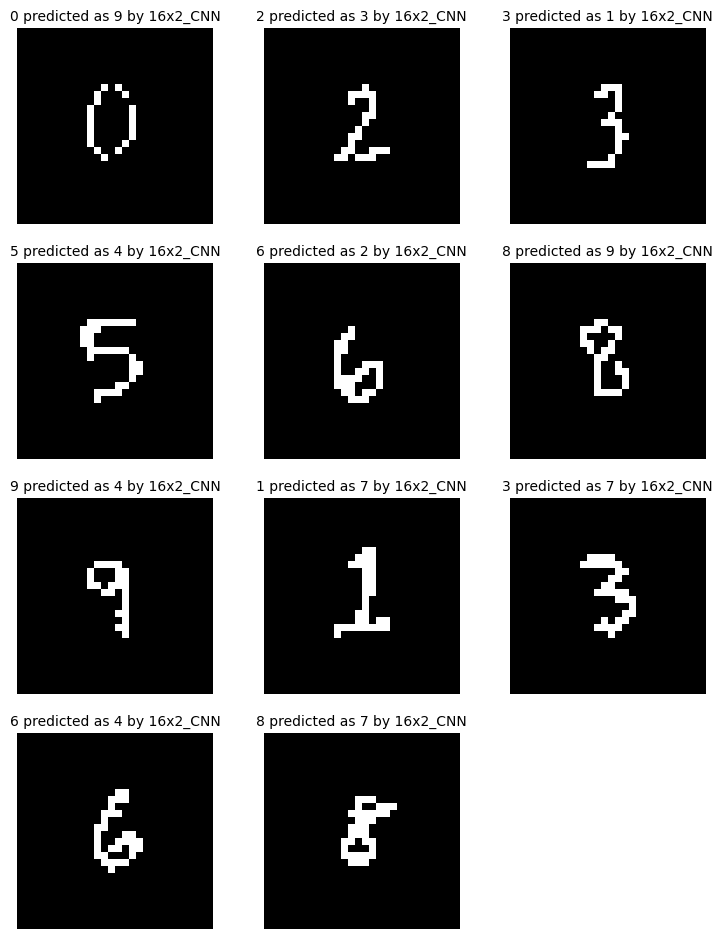

Accuracy of Models/CNN/16x4_CNN.keras: 45.00%


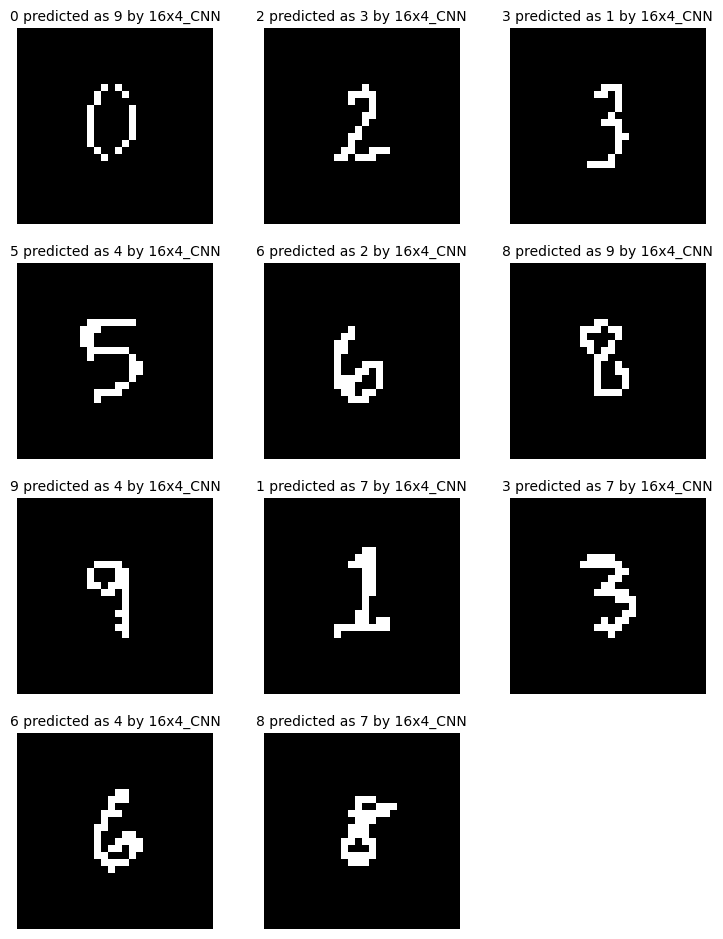

In [9]:
# For each neural network
# retrieve accuracy and show mispredictions!

for pred, model_dir in zip(all_preds, model_dirs):
    total = len(pred)
    correct = sum(p == t for p,t in zip(pred, labels))
    accuracy = correct / total

    print(f"Accuracy of {model_dir}: {accuracy * 100:.2f}%")

    # For each model, print the pictures they mispredict!
    cols = int(np.sqrt(correct + 1))
    rows = int(np.ceil(correct + 1 / cols))
    savename = (model_dir.split(".")[0]).split("/")[-1]
    plt.figure(figsize=(cols*3, rows*3))
    i = 1
    for p, truth, img in zip(pred, labels, test_images):
        if p != truth:
            ax = plt.subplot(rows, cols, i)
            ax.imshow(img, cmap='gray')
            ax.axis("off")
            ax.set_title(f"{truth} predicted as {p} by {savename}", fontsize=10)
            i += 1
    plt.savefig(f"Figures/DigitAnalysis/{savename}_analysis.png")
    plt.show()
    


C:\Users\Philip Felizarta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Philip Felizarta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Accuracy of SVM: 25.00%


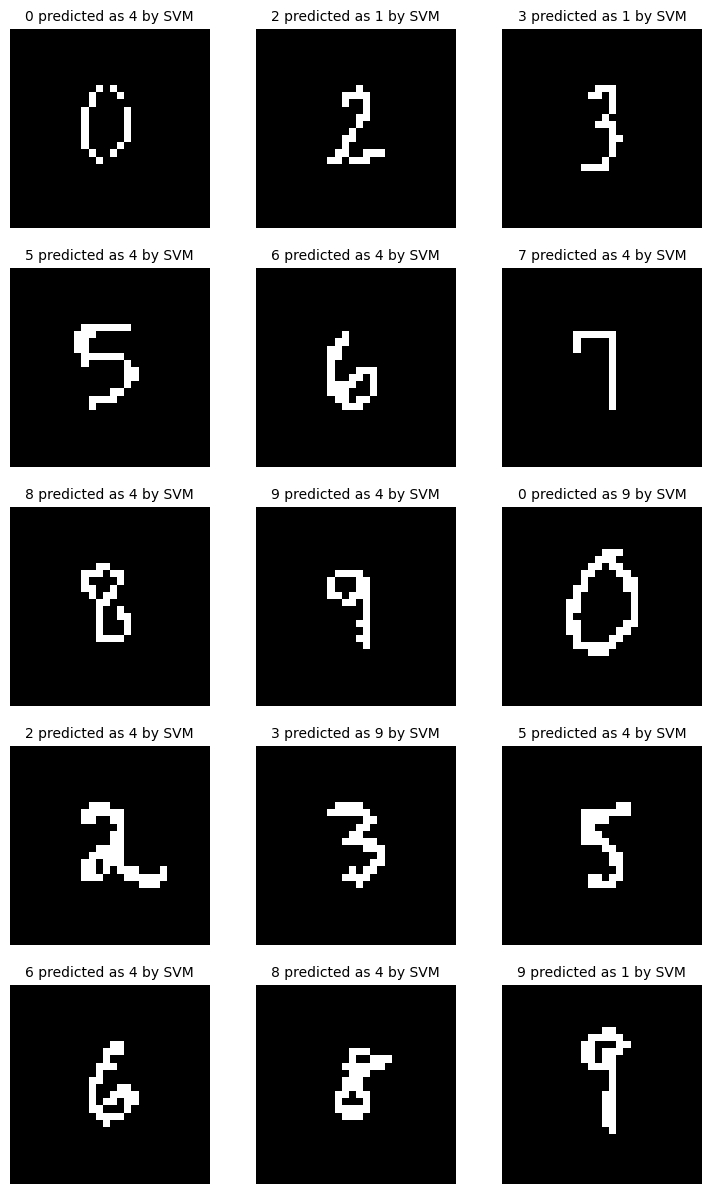

Accuracy of KNN: 0.00%


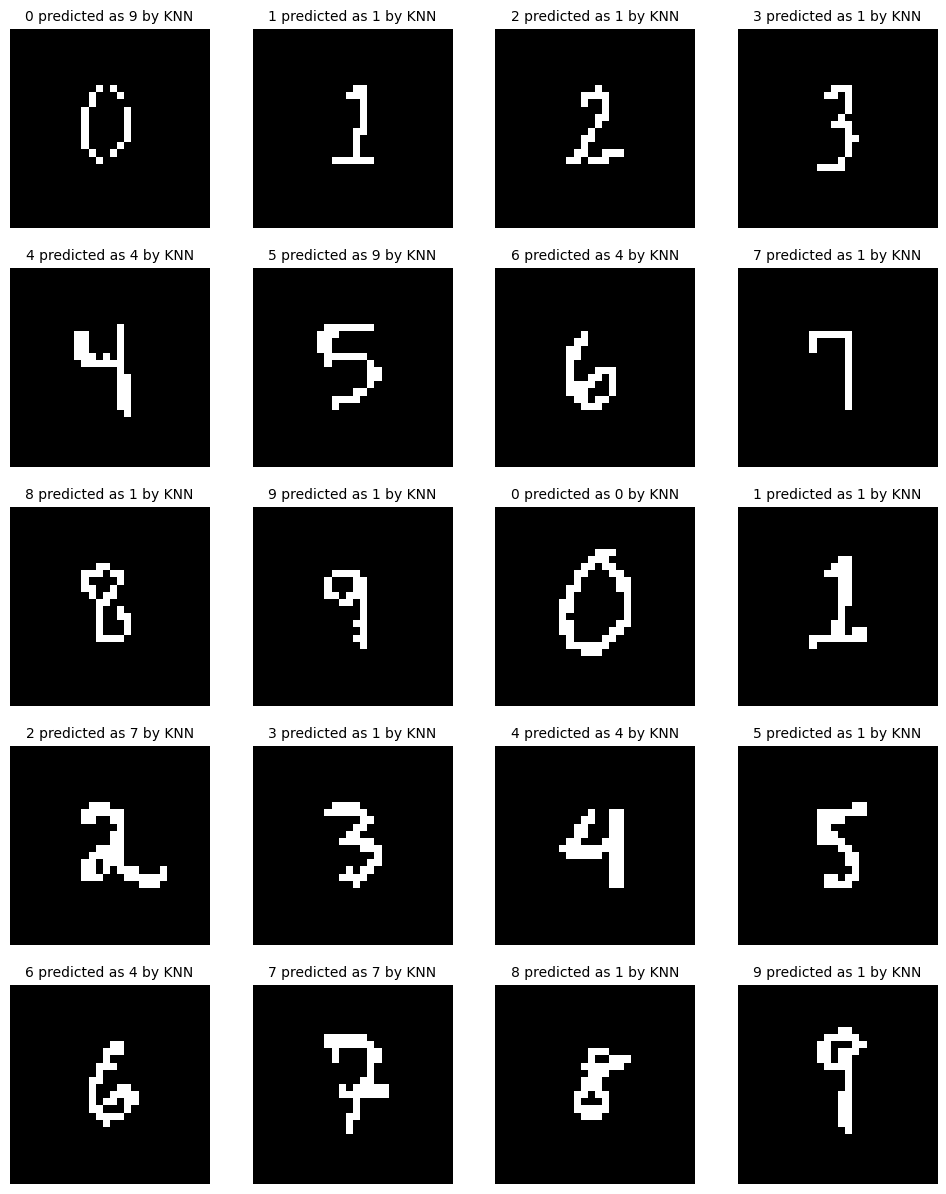

In [20]:

# Paths to your saved models
SVM_path = r'Models/Gabe/mnist_svm_by_Gabe.joblib'
KNN_path = r'Models/Gabe/knn_mnist_by_gabe.joblib'

# Loading the models
SVM_model = joblib.load(SVM_path)
KNN_model = joblib.load(KNN_path)

models = [SVM_model, KNN_model]
model_names = ["SVM", "KNN"]
new_preds = []
for model in models:
    preds = model.predict(flattened_images)
    new_preds.append(preds)

for model, name, pred in zip(models, model_names, new_preds):
    total = len(pred)
    correct = sum(p == t for p,t in zip(pred, labels))
    accuracy = correct / total

    print(f"Accuracy of {name}: {accuracy * 100:.2f}%")

    # For each model, print the pictures they mispredict!
    cols = int(np.sqrt(total-correct))
    rows = int(np.ceil((total-correct)/ cols))
    plt.figure(figsize=(cols*3, rows*3))
    i = 1
    for p, truth, img in zip(pred, labels, test_images):
        if p != truth:
            ax = plt.subplot(rows, cols, i)
            ax.imshow(img, cmap='gray')
            ax.axis("off")
            ax.set_title(f"{truth} predicted as {p} by {name}", fontsize=10)
            i += 1
    plt.savefig(f"Figures/DigitAnalysis/{name}_analysis.png")
    plt.show()
    
    


In [11]:
%%html
<canvas id="canvas" width="280" height="280" style="border:1px solid #000000; background-color: black;"></canvas>
<button id="saveButton">Save Image</button>
<p id="imageDataText" style="word-wrap: break-word;"></p>
<script>
    var canvas = document.getElementById('canvas');
    var ctx = canvas.getContext('2d');
    var mousePressed = false;
    var lastX, lastY;

    function draw(x, y, isDrawing) {
        if (isDrawing) {
            ctx.beginPath();
            ctx.strokeStyle = 'white';
            ctx.lineWidth = 20;
            ctx.lineJoin = 'round';
            ctx.moveTo(lastX, lastY);
            ctx.lineTo(x, y);
            ctx.closePath();
            ctx.stroke();
        }
        lastX = x;
        lastY = y;
    }

    canvas.addEventListener('mousedown', function(e) {
        mousePressed = true;
        draw(e.offsetX, e.offsetY, false);
    });

    canvas.addEventListener('mousemove', function(e) {
        if (mousePressed) {
            draw(e.offsetX, e.offsetY, true);
        }
    });

    canvas.addEventListener('mouseup', function() {
        mousePressed = false;
    });

    canvas.addEventListener('mouseleave', function() {
        mousePressed = false;
    });

    document.getElementById('saveButton').addEventListener('click', function() {
        var image_data_url = canvas.toDataURL('image/png');
        document.getElementById('imageDataText').innerText = image_data_url;
    });
</script>